# Car Price Prediction with Regression

In this notebook, I will apply different regression algorithms on [Car Price data from Kaggle](https://www.kaggle.com/goyalshalini93/car-data). My aim will be to:
1. Understand the data by exploring and visualizing.
2. Clean and make any necessary feature engineering.
3. Try different regression algorithms on different versions (unaltered, standardized & normalized) of the data.
4. Tune hyperparameters to get better results.

### Sections:
- Data Description & Cleaning
- Exploratory Data Analysis
        o Categorical Features
        o Numerical Features
        o Target Variable
- Winsorization
- Heatmap
- One-Hot-Encoding
- Standardization
- Normalization
- Building Machine Learning Models
        o Linear Regression
        o Lasso Regression
        o Ridge Regression
        o Support Vector Regressor
        o XGBoost
        o LightGBM
- Hyperparameter Tuning
        o Lasso Regression
        o Ridge Regression
        o Support Vector Regressor
        o XGBoost
        o LightGBM
- GridSearchCV Results & Final Comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
data_dict = pd.read_excel('Data Dictionary - carprices.xlsx', skiprows=3)
data_dict = data_dict.iloc[:-2, [7, 11]].rename({'Unnamed: 7': 'Column', 'Unnamed: 11': 'Description'}, axis=1)

# Car Data - Data Description & Cleaning

### Columns and Descriptions

In [3]:
pd.set_option('max_colwidth', 250)
display(data_dict)

,Column,Description
0,Car_ID,Unique id of each observation (Interger)
1,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
2,carCompany,Name of car company (Categorical)
3,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Aspiration used in a car (Categorical)
5,doornumber,Number of doors in a car (Categorical)
6,carbody,body of car (Categorical)
7,drivewheel,type of drive wheel (Categorical)
8,enginelocation,Location of car engine (Categorical)
9,wheelbase,Weelbase of car (Numeric)


In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['brand'] = df['brand'].replace({'vokswagen': 'volkswagen', 'vw': 'volkswagen', 'maxda': 'mazda',
                                   'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota'})

In [6]:
df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [7]:
df['symboling'] = df['symboling'].astype('category')

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'brand'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    category
 2   CarName           205 non-null    object  
 3   fueltype          205 non-null    object  
 4   aspiration        205 non-null    object  
 5   doornumber        205 non-null    object  
 6   carbody           205 non-null    object  
 7   drivewheel        205 non-null    object  
 8   enginelocation    205 non-null    object  
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    object  
 15  cylindernumber    205 non-null    object  
 16  enginesize        205 non-

In [10]:
df.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
df.describe(include='O')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand
count,205,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8,22
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi,toyota
freq,6,185,168,115,96,120,202,148,159,94,32


In [12]:
df.select_dtypes('object').nunique()

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
brand              22
dtype: int64

# Exploratory Data Analysis

## Categorical Features

In [13]:
categorical_features = list(df.select_dtypes(['O', 'category']).drop('CarName', axis=1).columns)

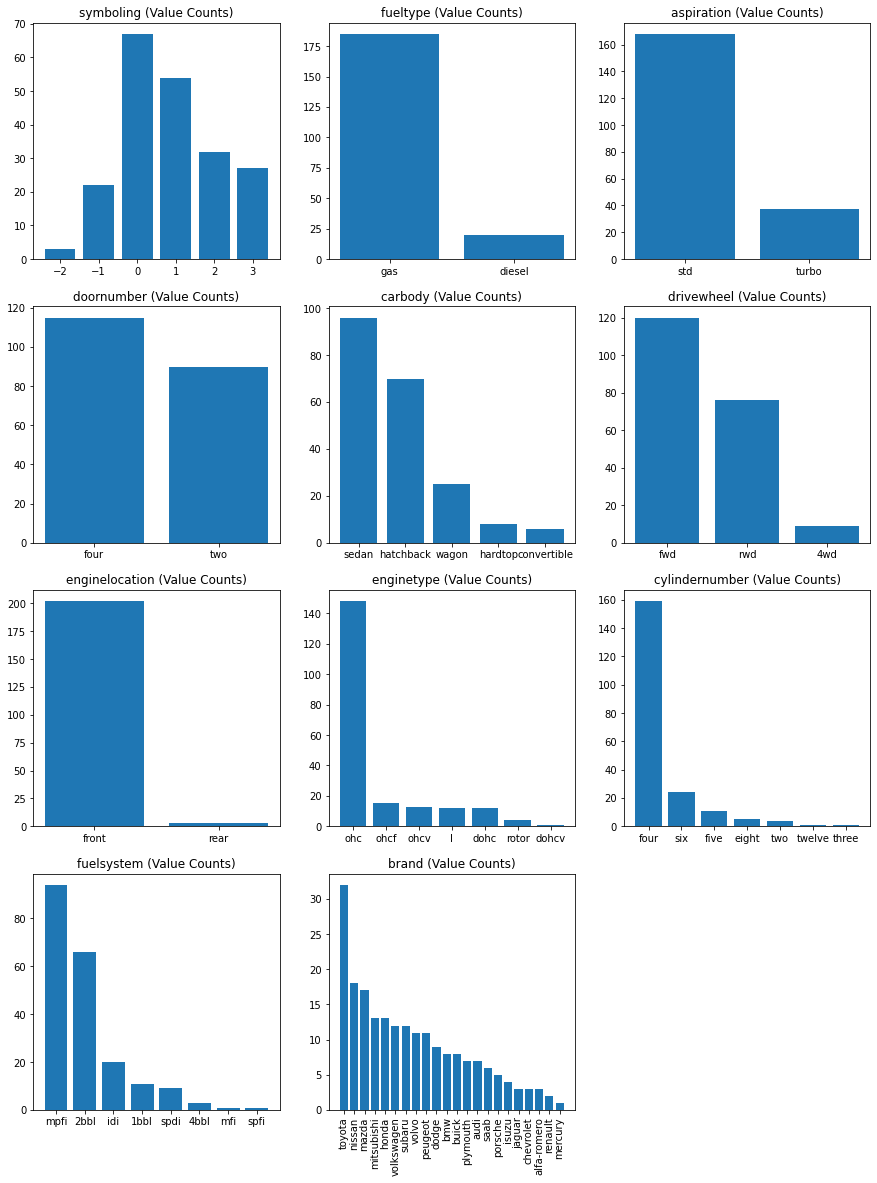

In [14]:
plt.figure(figsize=(15, 20))

for i in range(len(categorical_features) - 1):
    plt.subplot(4, 3, i+1)
    plt.title(categorical_features[i] + ' (Value Counts)')
    plt.bar(df[categorical_features[i]].value_counts().index,
            df[categorical_features[i]].value_counts())
    
plt.subplot(4, 3, 11)
plt.title('brand (Value Counts)')
plt.bar(df['brand'].value_counts().index,
        df['brand'].value_counts())
plt.xticks(rotation=90)

plt.show()

In [15]:
for i in range(len(categorical_features)):
    print(df.groupby(categorical_features[i])['price'].mean(), '\n')

symboling
-2    15781.666667
-1    17330.681818
0     14366.965179
1     10037.907407
2     10109.281250
3     17221.296296
Name: price, dtype: float64 

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64 

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64 

doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64 

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64 

drivewheel
4wd    11087.463000
fwd     9239.308333
rwd    19910.809211
Name: price, dtype: float64 

enginelocation
front    12961.097361
rear     34528.000000
Name: price, dtype: float64 

enginetype
dohc     18116.416667
dohcv    31400.500000
l        14627.583333
ohc      11574.048426
ohcf     13738.600000
ohcv     25098.384615
rotor    13020.000000
Name: price, dtype: float64 

cylindernumber
eight     37400.100

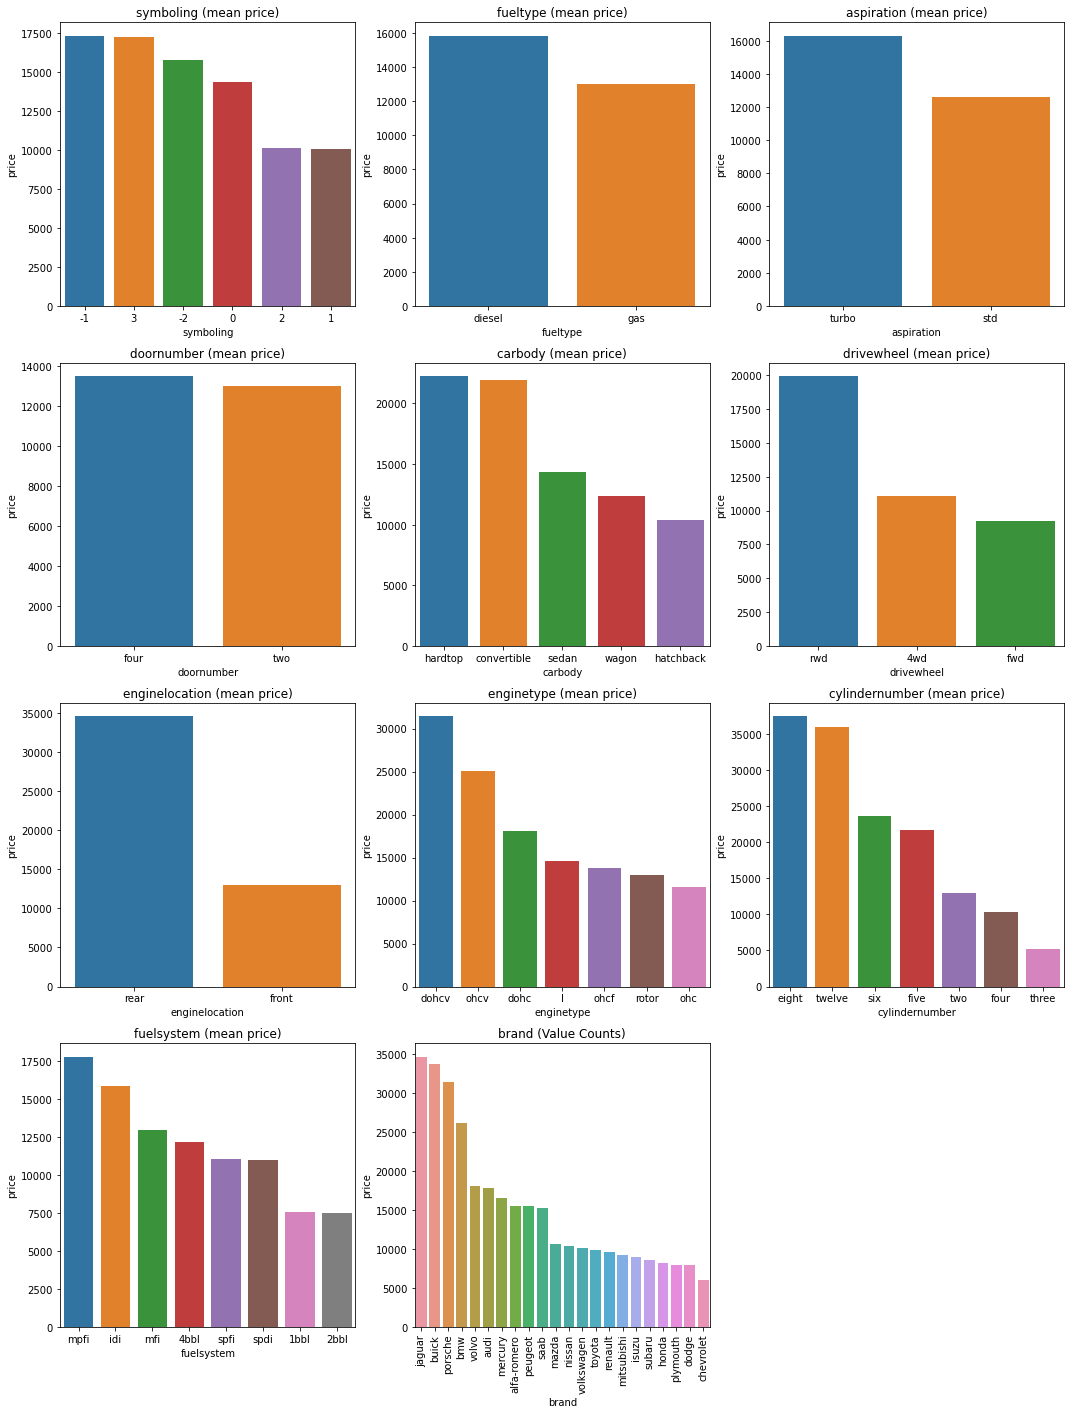

In [16]:
plt.figure(figsize=(18, 24))

for i in range(len(categorical_features)-1):
    plt.subplot(4, 3, i+1)
    plt.title(categorical_features[i] + ' (mean price)')
    sns.barplot(categorical_features[i], 'price', data=df,
                order=df.groupby(categorical_features[i])['price'].mean().sort_values(ascending=False).index, ci=None)
    
plt.subplot(4, 3, 11)
plt.title('brand (Value Counts)')
sns.barplot('brand', 'price', data=df, ci=None,
           order=df.groupby('brand')['price'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.show()

## Numerical Features

In [17]:
numeric_features = list(df.select_dtypes([np.int64, np.float64]).drop('car_ID', axis=1).columns)

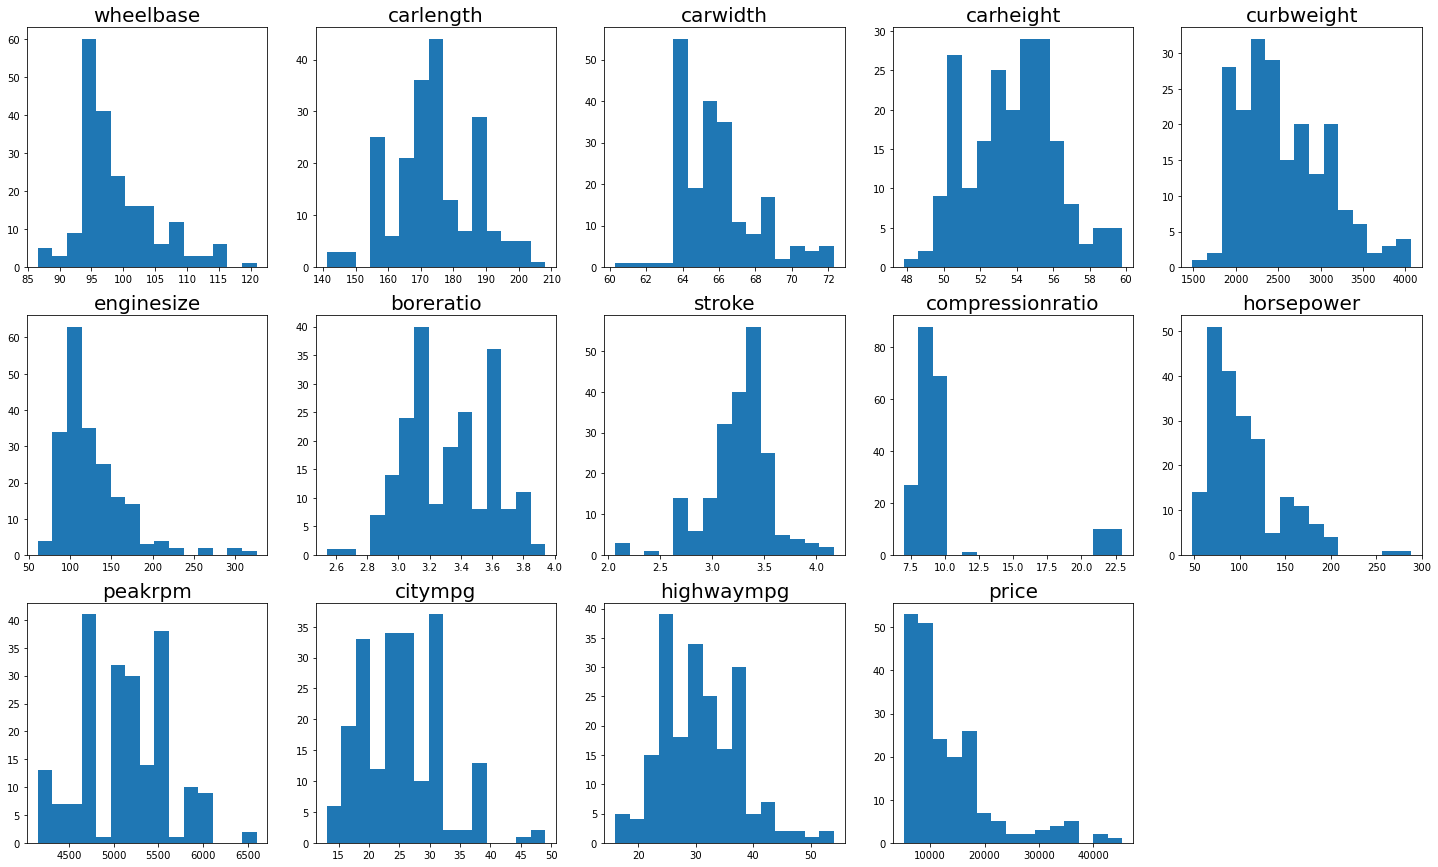

In [18]:
plt.figure(figsize=(25, 15))

for i in range(len(numeric_features)):
    plt.subplot(3, 5, i+1)
    plt.title(numeric_features[i], fontsize=20)
    plt.hist(df[numeric_features[i]], bins=15)
    
plt.show()

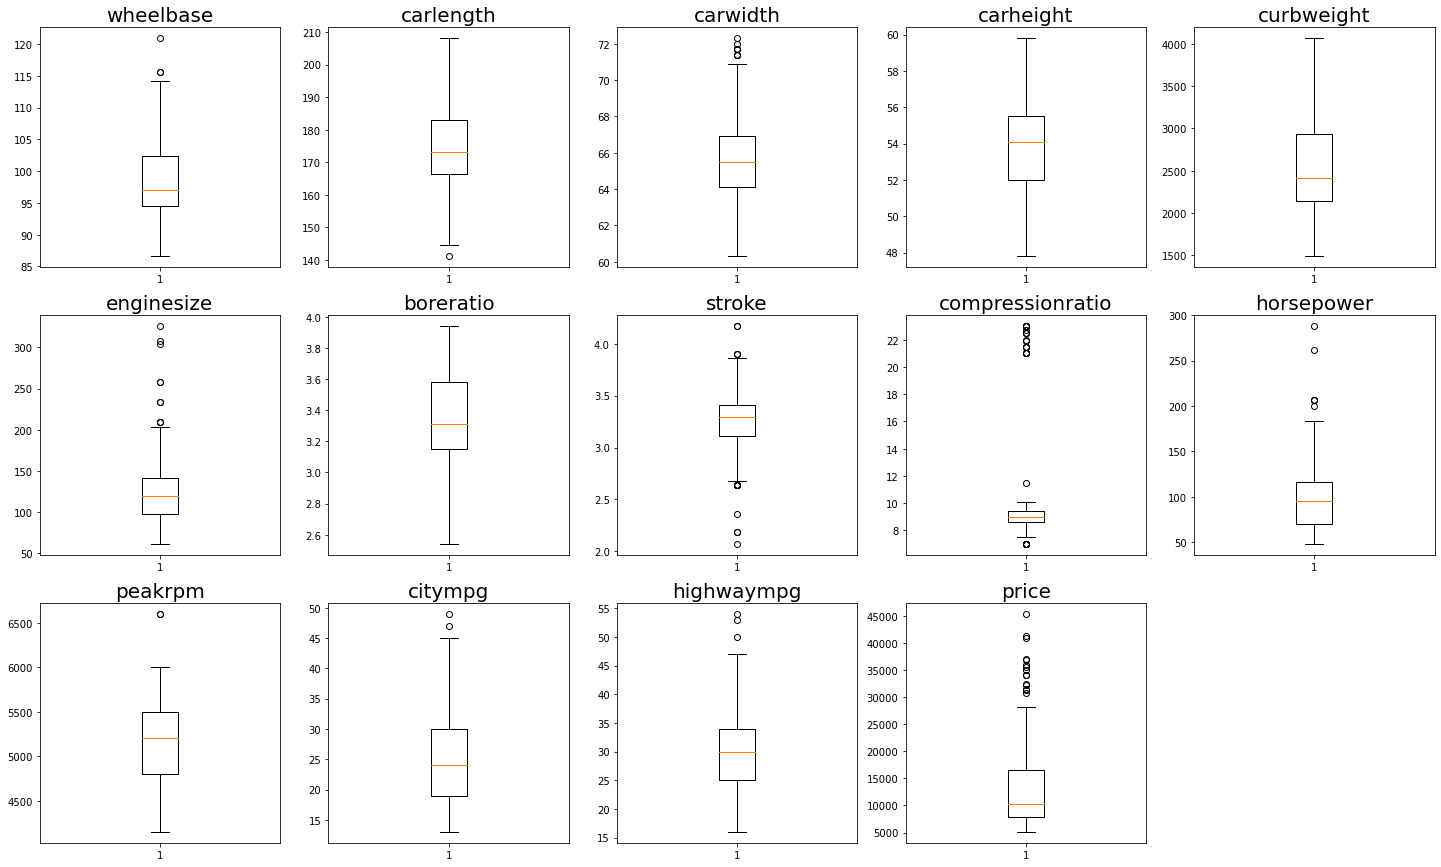

In [19]:
plt.figure(figsize=(25, 15))

for i in range(len(numeric_features)):
    plt.subplot(3, 5, i+1)
    plt.title(numeric_features[i], fontsize=20)
    plt.boxplot(df[numeric_features[i]])
    
plt.show()

### Correlations between Features & Target Variable

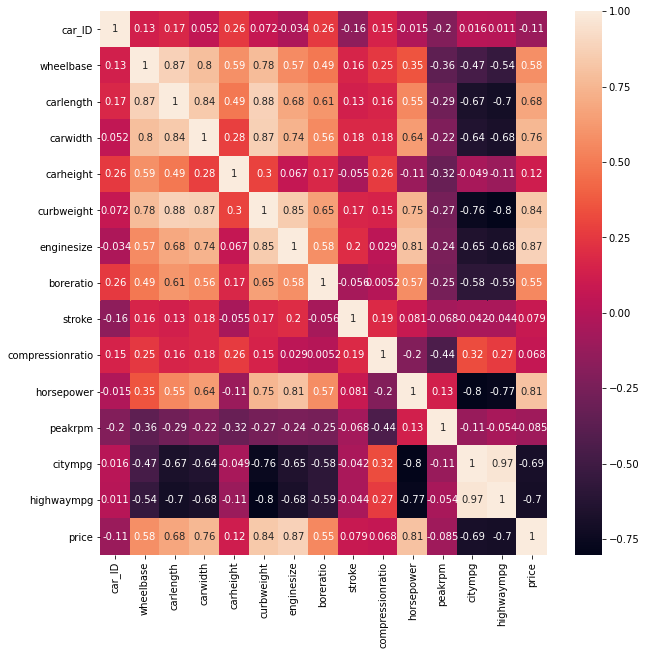

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Highest positive correlations with **price** column:
- **enginesize**: 0.87
- **curbweight**: 0.84
- **horsepower**: 0.81
- **carwidth**: 0.76

Highest negative correlations **price** column:
- **highwaympg**: -0.7
- **citympg**: -0.69

### Scatter Plot of Features with Highest Correlations and Target Variable

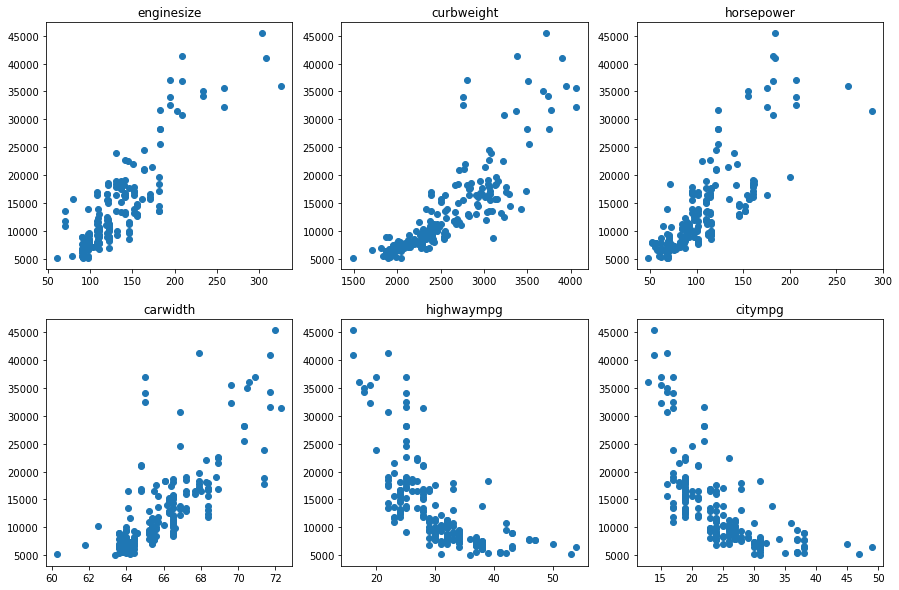

In [21]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(df['enginesize'], df['price'])
plt.title('enginesize')

plt.subplot(2, 3, 2)
plt.scatter(df['curbweight'], df['price'])
plt.title('curbweight')

plt.subplot(2, 3, 3)
plt.scatter(df['horsepower'], df['price'])
plt.title('horsepower')

plt.subplot(2, 3, 4)
plt.scatter(df['carwidth'], df['price'])
plt.title('carwidth')

plt.subplot(2, 3, 5)
plt.scatter(df['highwaympg'], df['price'])
plt.title('highwaympg')

plt.subplot(2, 3, 6)
plt.scatter(df['citympg'], df['price'])
plt.title('citympg')

plt.show()

### Scatter Plot of All Features and Target Variable

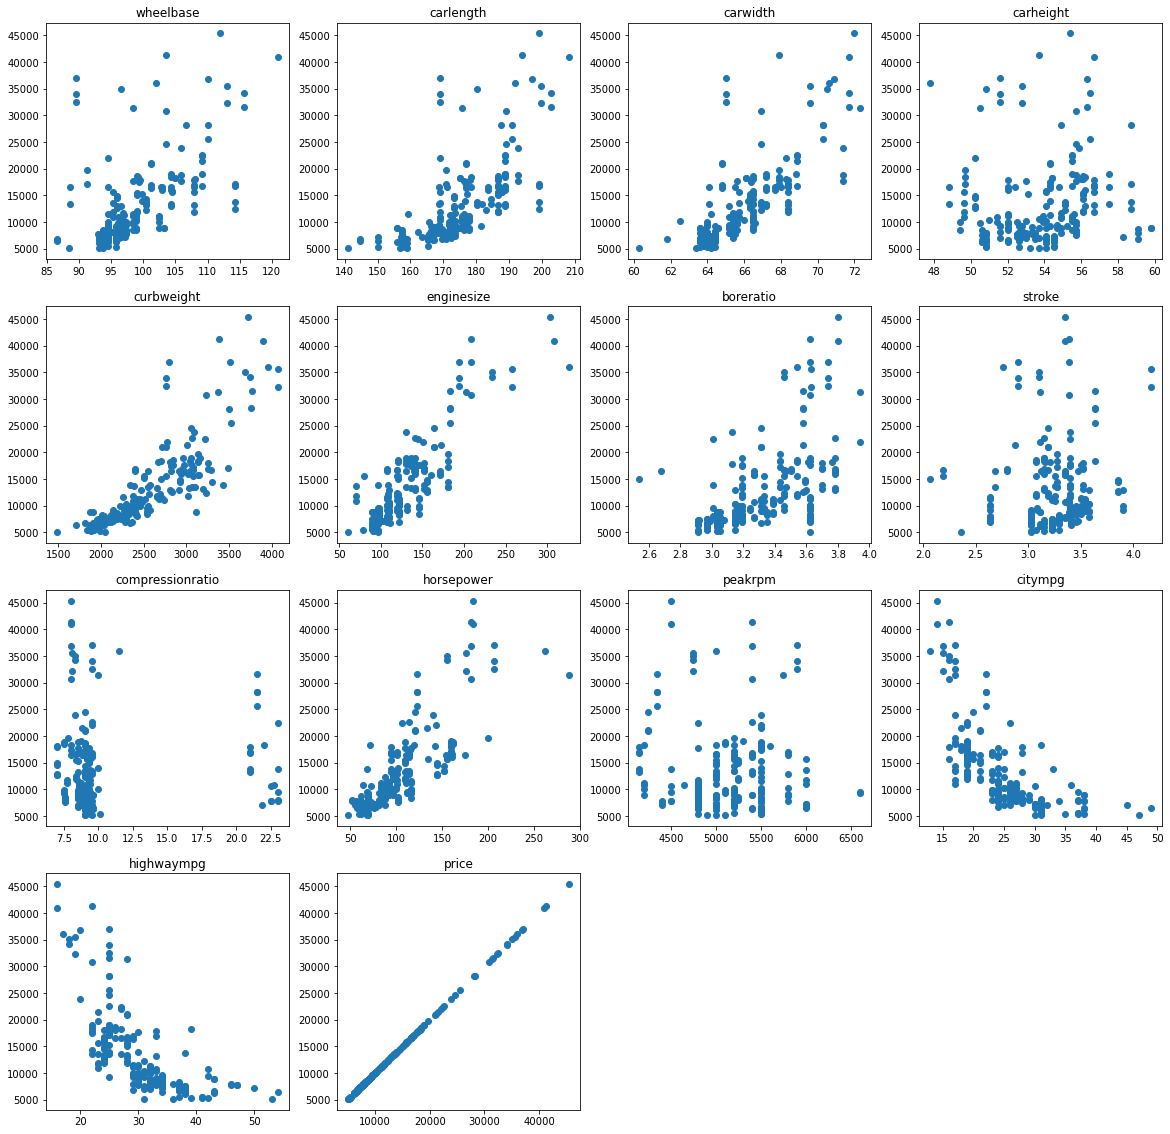

In [22]:
plt.figure(figsize=(20, 20))

for i in range(len(numeric_features)):
    plt.subplot(4, 4, i+1)
    plt.scatter(df[numeric_features[i]], df['price'])
    plt.title(numeric_features[i])

plt.show()

## Target Variable (Price)

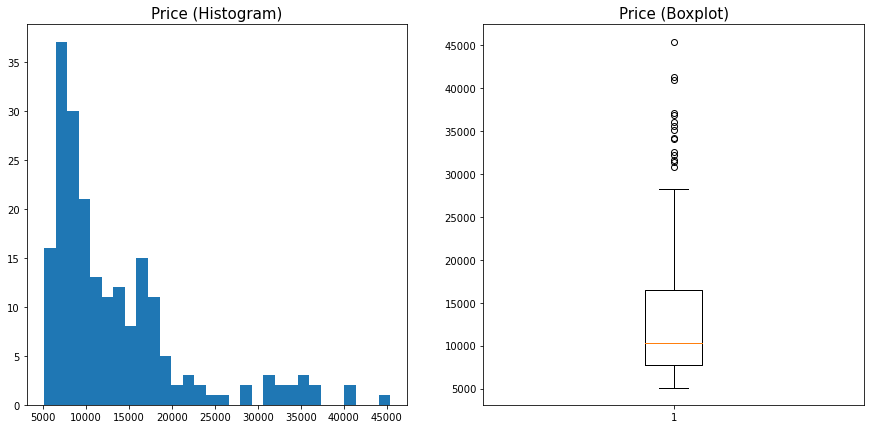

In [23]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=30)
plt.title('Price (Histogram)', fontsize=15)

plt.subplot(1, 2, 2)
plt.boxplot(df['price'])
plt.title('Price (Boxplot)', fontsize=15)

plt.show()

# Winsorization

Features with outliers:
- **carwidth**
- **enginesize**
- **stroke**
- **compressionratio**

In [24]:
df['carwidth_winsorize'] = winsorize(df['carwidth'], limits=[0, 0.1])
df['enginesize_winsorize'] = winsorize(df['enginesize'], limits=[0, 0.1])
df['stroke_winsorize'] = winsorize(df['stroke'], limits=[0.1, 0.1])
df['compressionratio_winsorize'] = winsorize(df['compressionratio'], limits=[0.1, 0.1])

In [25]:
display(df[['carwidth','carwidth_winsorize']].describe())
display(df[['enginesize','enginesize_winsorize']].describe())
display(df[['stroke','stroke_winsorize']].describe())
display(df[['compressionratio','compressionratio_winsorize']].describe())

,carwidth,carwidth_winsorize
count,205.000000,205.000000
mean,65.907805,65.735610
std,2.145204,1.773871
min,60.300000,60.300000
25%,64.100000,64.100000
50%,65.500000,65.500000
75%,66.900000,66.900000
max,72.300000,68.800000


,enginesize,enginesize_winsorize
count,205.000000,205.000000
mean,126.907317,122.965854
std,41.642693,30.521831
min,61.000000,61.000000
25%,97.000000,97.000000
50%,120.000000,120.000000
75%,141.000000,141.000000
max,326.000000,181.000000


,stroke,stroke_winsorize
count,205.000000,205.000000
mean,3.255415,3.262585
std,0.313597,0.209144
min,2.070000,2.870000
25%,3.110000,3.110000
50%,3.290000,3.290000
75%,3.410000,3.410000
max,4.170000,3.540000


,compressionratio,compressionratio_winsorize
count,205.000000,205.000000
mean,10.142537,9.175707
std,3.972040,0.931595
min,7.000000,8.000000
25%,8.600000,8.600000
50%,9.000000,9.000000
75%,9.400000,9.400000
max,23.000000,11.500000


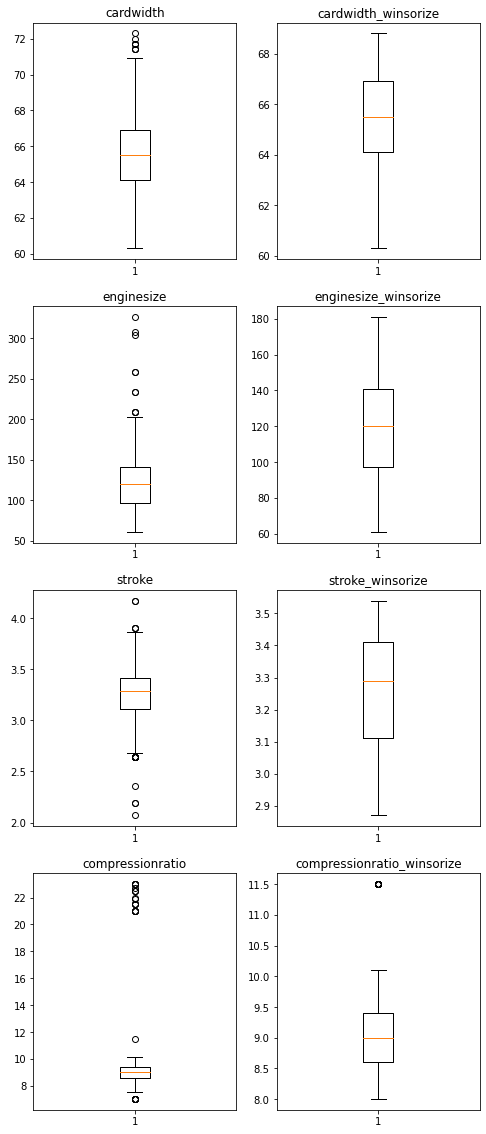

In [26]:
plt.figure(figsize=(8, 20))

plt.subplot(4, 2, 1)
plt.boxplot(df['carwidth'])
plt.title('cardwidth')

plt.subplot(4, 2, 2)
plt.boxplot(df['carwidth_winsorize'])
plt.title('cardwidth_winsorize')

plt.subplot(4, 2, 3)
plt.boxplot(df['enginesize'])
plt.title('enginesize')

plt.subplot(4, 2, 4)
plt.boxplot(df['enginesize_winsorize'])
plt.title('enginesize_winsorize')

plt.subplot(4, 2, 5)
plt.boxplot(df['stroke'])
plt.title('stroke')

plt.subplot(4, 2, 6)
plt.boxplot(df['stroke_winsorize'])
plt.title('stroke_winsorize')

plt.subplot(4, 2, 7)
plt.boxplot(df['compressionratio'])
plt.title('compressionratio')

plt.subplot(4, 2, 8)
plt.boxplot(df['compressionratio_winsorize'])
plt.title('compressionratio_winsorize')

plt.show()

In [27]:
df = df.drop(['carwidth', 'enginesize', 'stroke', 'compressionratio'], axis=1)

# Heatmap (Numerical features only)

In [28]:
df = df[['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
         'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
         'carlength', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
        'fuelsystem', 'boreratio', 'horsepower', 'peakrpm', 'citympg',
        'highwaympg', 'brand', 'carwidth_winsorize',
        'enginesize_winsorize', 'stroke_winsorize',
        'compressionratio_winsorize', 'price']]

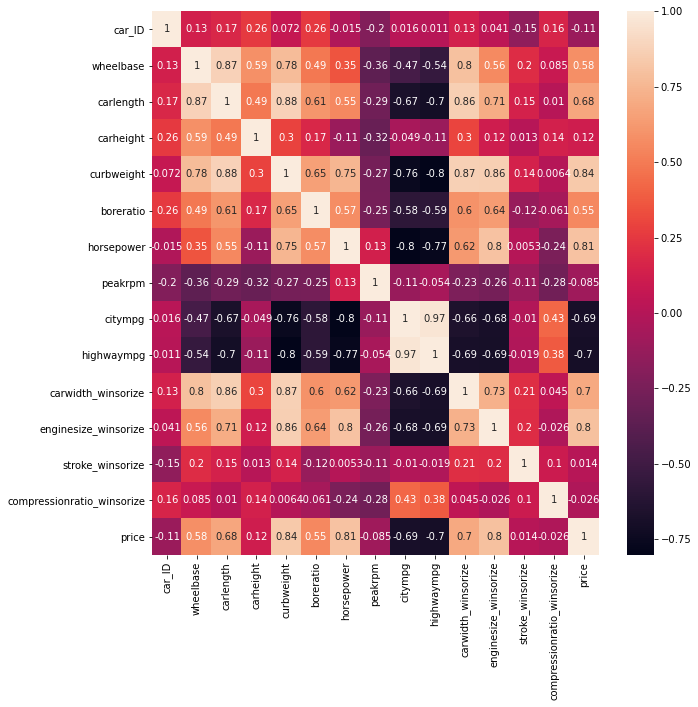

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# One-Hot-Encoding

In [30]:
df = pd.get_dummies(df.drop('CarName', axis=1))

In [31]:
y = df['price']
X = df.drop(['price', 'car_ID'], axis=1)

# Standardization

In [32]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled = df_scaled.drop(['price', 'car_ID'], axis=1)

# Normalization

In [33]:
normalizer = Normalizer()

df_normalized = pd.DataFrame(normalizer.fit_transform(df), columns=df.columns)
X_normalized = df_normalized.drop(['price', 'car_ID'], axis=1)

In [34]:
print('X:')
display(X.head())

print('X_scaled:')
display(X_scaled.head())

print('X_normalized:')
display(X_normalized.head())

X:


,wheelbase,carlength,carheight,curbweight,boreratio,horsepower,peakrpm,citympg,highwaympg,carwidth_winsorize,...,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
0,88.6,168.8,48.8,2548,3.47,111,5000,21,27,64.1,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,48.8,2548,3.47,111,5000,21,27,64.1,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,52.4,2823,2.68,154,5000,19,26,65.5,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,54.3,2337,3.19,102,5500,24,30,66.2,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,54.3,2824,3.19,115,5500,18,22,66.4,...,0,0,0,0,0,0,0,0,0,0


X_scaled:


,wheelbase,carlength,carheight,curbweight,boreratio,horsepower,peakrpm,citympg,highwaympg,carwidth_winsorize,...,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
0,-1.690772,-0.426521,-2.020417,-0.014566,0.519071,0.174483,-0.262960,-0.646553,-0.546059,-0.924314,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-2.020417,-0.014566,0.519071,0.174483,-0.262960,-0.646553,-0.546059,-0.924314,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.543527,0.514882,-2.404880,1.264536,-0.262960,-0.953012,-0.691627,-0.133148,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.235942,-0.420797,-0.517266,-0.053668,0.787855,-0.186865,-0.109354,0.262436,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.235942,0.516807,-0.517266,0.275883,0.787855,-1.106241,-1.273900,0.375459,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


X_normalized:


,wheelbase,carlength,carheight,curbweight,boreratio,horsepower,peakrpm,citympg,highwaympg,carwidth_winsorize,...,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
0,0.006061,0.011548,0.003338,0.174308,0.000237,0.007593,0.342048,0.001437,0.001847,0.004385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005083,0.009684,0.002800,0.146182,0.000199,0.006368,0.286857,0.001205,0.001549,0.003678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.005408,0.009798,0.002999,0.161562,0.000153,0.008813,0.286153,0.001087,0.001488,0.003749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006575,0.011635,0.003577,0.153968,0.000210,0.006720,0.362355,0.001581,0.001976,0.004361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.005369,0.009538,0.002933,0.152524,0.000172,0.006211,0.297055,0.000972,0.001188,0.003586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Building Machine Learning Models

- Linear Regression
- Lasso Regression
- Ridge Regression
- Support Vector Regressor
- XGBoost
- LightGBM

In [35]:
def fit_predict_score(Model, X_train, y_train, X_test, y_test):
    """Fit the model of your choice,
    predict for test data,
    returns MAE, MSE, RMSE."""
    model = Model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    return (train_score, test_score, metrics.mean_absolute_error(y_test, y_pred),
            metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

def model_comparison(X, y):
    """Creates a DataFrame comparing Linear Regression, Lasso, Ridge, SVR (kernel: linear),
    XBRegressor, and LGBMRegressor scores and errors."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    lrm_train_score, lrm_test_score, lrm_mae, lrm_mse, lrm_rmse = fit_predict_score(LinearRegression(), X_train, y_train, X_test, y_test)
    lasso_train_score, lasso_test_score, lasso_mae, lasso_mse, lasso_rmse = fit_predict_score(Lasso(), X_train, y_train, X_test, y_test)
    ridge_train_score, ridge_test_score, ridge_mae, ridge_mse, ridge_rmse = fit_predict_score(Ridge(), X_train, y_train, X_test, y_test)
    svr_train_score, svr_test_score, svr_mae, svr_mse, svr_rmse = fit_predict_score(SVR(kernel='linear'), X_train, y_train, X_test, y_test)
    xgbr_train_score, xgbr_test_score, xgbr_mae, xgbr_mse, xgbr_rmse = fit_predict_score(XGBRegressor(), X_train, y_train, X_test, y_test)
    lgbr_train_score, lgbr_test_score, lgbr_mae, lgbr_mse, lgbr_rmse = fit_predict_score(LGBMRegressor(), X_train, y_train, X_test, y_test)
    
    models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression',
          'SVM (kernel:linear)', 'XGBoost (Regressor)', 'LightGBM (Regressor)']
    train_score = [lrm_train_score, lasso_train_score, ridge_train_score, svr_train_score, xgbr_train_score, lgbr_train_score]
    test_score = [lrm_test_score, lasso_test_score, ridge_test_score, svr_test_score, xgbr_test_score, lgbr_test_score]
    mae = [lrm_mae, lasso_mae, ridge_mae, svr_mae, xgbr_mae, lgbr_mae]
    mse = [lrm_mse, lasso_mse, ridge_mse, svr_mse, xgbr_mse, lgbr_mse]
    rmse = [lrm_rmse, lasso_rmse, ridge_rmse, svr_rmse, xgbr_rmse, lgbr_rmse]
    
    model_comparison = pd.DataFrame(data=[models, train_score, test_score, mae, mse, rmse]).T.rename({0: 'Model', 1:'Training Score',
                                                                                    2: 'Test Score',
                                                                                    3:'Mean Absolute Error',
                                                                                    4: 'Mean Squared Error',
                                                                                    5:'Root Mean Squared Error'}, axis=1)
    
    return model_comparison

In [36]:
print("Default:")
display(model_comparison(X, y))
print("Scaled:")
display(model_comparison(X_scaled, y))
print("Normalized:")
display(model_comparison(X_normalized, y))

Default:


,Model,Training Score,Test Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.976894,0.887071,1893.18,7.38956e+06,2718.37
1,Lasso Regression,0.976767,0.889955,1882.4,7.2008e+06,2683.43
2,Ridge Regression,0.969766,0.870352,2096.91,8.48357e+06,2912.66
3,SVM (kernel:linear),0.753245,0.687277,2673.63,2.04631e+07,4523.62
4,XGBoost (Regressor),0.998525,0.894413,1804.38,6.90909e+06,2628.51
5,LightGBM (Regressor),0.956593,0.873913,1911.44,8.25053e+06,2872.37


Scaled:


,Model,Training Score,Test Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.976837,-1.17487e+21,5.29732e+13,7.68776e+28,2.77268e+14
1,Lasso Regression,0.976881,0.888374,1888.9,7.30426e+06,2702.64
2,Ridge Regression,0.976163,0.886082,1919.54,7.45424e+06,2730.24
3,SVM (kernel:linear),0.139627,0.160109,4407.15,5.49584e+07,7413.4
4,XGBoost (Regressor),0.998525,0.894413,1804.38,6.90909e+06,2628.51
5,LightGBM (Regressor),0.956767,0.871678,1895.18,8.39675e+06,2897.71


Normalized:


,Model,Training Score,Test Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.973179,0.880587,1906.22,7.81384e+06,2795.32
1,Lasso Regression,0.871821,0.884432,1922.74,7.56222e+06,2749.95
2,Ridge Regression,0.774962,0.75504,2511.94,1.6029e+07,4003.63
3,SVM (kernel:linear),-0.112992,-0.0677736,5338.4,6.987e+07,8358.83
4,XGBoost (Regressor),1,0.979461,544.404,1.34398e+06,1159.3
5,LightGBM (Regressor),0.981908,0.964554,884.217,2.31939e+06,1522.95


# Hyperparameter Tuning

## Lasso

In [37]:
params = {'alpha': [10**i for i in range(1, 5)] + [round(0.1**i,5) for i in range(5)]}

lasso_grid = GridSearchCV(estimator = Lasso(),
                        param_grid = params,                        
                        cv = 5)

lasso_grid.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [10, 100, 1000, 10000, 1.0, 0.1, 0.01, 0.001,
                                   0.0001]})

In [38]:
print('Best Score: ', lasso_grid.best_score_)
print('Best Params: ', lasso_grid.best_params_)

Best Score:  0.5664079960606732
Best Params:  {'alpha': 100}


In [39]:
display(pd.DataFrame(pd.DataFrame(lasso_grid.cv_results_)[['param_alpha', 'mean_test_score']].groupby(['param_alpha'])['mean_test_score'].mean()).reset_index().sort_values('param_alpha'))

,param_alpha,mean_test_score
0,0.0001,0.054227
1,0.0010,0.056380
2,0.0100,0.075661
3,0.1000,0.177986
4,1.0000,0.217763
5,10.0000,0.321114
6,100.0000,0.566408
7,1000.0000,0.554982
8,10000.0000,-0.091494


## Ridge

In [40]:
params = {'alpha': [10**i for i in range(1, 5)] + [round(0.1**i,5) for i in range(5)]}

ridge_grid = GridSearchCV(estimator = Ridge(),
                        param_grid = params,                        
                        cv = 5)

ridge_grid.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [10, 100, 1000, 10000, 1.0, 0.1, 0.01, 0.001,
                                   0.0001]})

In [41]:
print('Best Score: ', ridge_grid.best_score_)
print('Best Params: ', ridge_grid.best_params_)

Best Score:  0.4910703805828982
Best Params:  {'alpha': 1000}


In [42]:
display(pd.DataFrame(pd.DataFrame(ridge_grid.cv_results_)[['param_alpha', 'mean_test_score']].groupby(['param_alpha'])['mean_test_score'].mean()).reset_index().sort_values('param_alpha'))

,param_alpha,mean_test_score
0,0.0001,0.190516
1,0.0010,0.190790
2,0.0100,0.193489
3,0.1000,0.216594
4,1.0000,0.304898
5,10.0000,0.400498
6,100.0000,0.458771
7,1000.0000,0.491070
8,10000.0000,0.128586


## Support Vector Machine

In [43]:
params = {'C': [10**i for i in range(1, 2)] + [round(0.1**i,5) for i in range(5)],
          'kernel': ['linear']}

svr_grid = GridSearchCV(estimator = SVR(),
                        param_grid = params,                        
                        cv = 5)

svr_grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [10, 1.0, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']})

In [44]:
display(pd.DataFrame(pd.DataFrame(svr_grid.cv_results_)[['param_C', 'mean_test_score']].groupby(['param_C'])['mean_test_score'].mean()).reset_index().sort_values('param_C'))

,param_C,mean_test_score
0,0.0001,0.393881
1,0.0010,0.549769
2,0.0100,0.519258
3,0.1000,0.482249
4,1.0000,0.450995
5,10.0000,0.433580


In [45]:
print('Best Score: ', svr_grid.best_score_)
print('Best Params: ', svr_grid.best_params_)

Best Score:  0.5497693524453848
Best Params:  {'C': 0.001, 'kernel': 'linear'}


## XGBoost

In [46]:
params = {
        'learning_rate': [0.1, 0.3, 0.5],
        'max_depth': [1, 3, 5],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.1, 0.3, 0.5],
        'colsample_bytree': [0.1, 0.3, 0.5],
        'n_estimators' : [100, 200, 500, 750, 1000],
        'objective': ['reg:squarederror']
}

xgbr_grid = GridSearchCV(estimator = XGBRegressor(),
                         param_grid = params,
                         cv = 3)

xgbr_grid.fit(X_normalized, y)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [47]:
pd.DataFrame(xgbr_grid.cv_results_)[['param_colsample_bytree', 'param_learning_rate', 'param_max_depth',
       'param_min_child_weight', 'param_n_estimators',
       'param_subsample', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,mean_test_score
503,0.3,0.1,5,1,500,0.5,0.989807
509,0.3,0.1,5,1,1000,0.5,0.989807
506,0.3,0.1,5,1,750,0.5,0.989807
500,0.3,0.1,5,1,200,0.5,0.989759
515,0.3,0.1,5,3,200,0.5,0.989647


In [48]:
print('Best Score: ', xgbr_grid.best_score_)
print('Best Params: ', xgbr_grid.best_params_)

Best Score:  0.9898073985181286
Best Params:  {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.5}


## LightGBM

In [49]:
params = {
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'n_estimators': [100, 200, 500, 750, 1000]
}

lgbr_grid = GridSearchCV(estimator = LGBMRegressor(),
                        param_grid = params,                        
                        cv = 3)

lgbr_grid.fit(X_normalized, y)

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 500, 750, 1000]})

In [50]:
pd.DataFrame(lgbr_grid.cv_results_)[['param_learning_rate', 'param_n_estimators', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,param_learning_rate,param_n_estimators,mean_test_score
9,0.01,1000,0.933556
11,0.1,200,0.932190
10,0.1,100,0.928934
8,0.01,750,0.928884
12,0.1,500,0.924122


In [51]:
print('Best Score: ', lgbr_grid.best_score_)
print('Best Params: ', lgbr_grid.best_params_)

Best Score:  0.9335561802187753
Best Params:  {'learning_rate': 0.01, 'n_estimators': 1000}


# GridSearchCV Results & Final Comparison

In [52]:
print('Lasso: X_scaled')
print('Lasso Best Params: {}\n'.format(lasso_grid.best_params_))

print('Ridge: X_scaled')
print('Ridge Best Params: {}\n'.format(ridge_grid.best_params_))

print('SVR: X' )
print('SVR Best Params: {}\n'.format(svr_grid.best_params_))

print('XGBRegressor: X_normalized')
print('XGBRegressor Best Params: {}\n'.format(xgbr_grid.best_params_))

print('LGBMRegressor: X_normalized')
print('LGBMRegressor Best Params: {}'.format(lgbr_grid.best_params_))

Lasso: X_scaled
Lasso Best Params: {'alpha': 100}

Ridge: X_scaled
Ridge Best Params: {'alpha': 1000}

SVR: X
SVR Best Params: {'C': 0.001, 'kernel': 'linear'}

XGBRegressor: X_normalized
XGBRegressor Best Params: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.5}

LGBMRegressor: X_normalized
LGBMRegressor Best Params: {'learning_rate': 0.01, 'n_estimators': 1000}


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# Lasso
lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)

lasso_mae = metrics.mean_absolute_error(y_test, y_pred)
lasso_mse = metrics.mean_squared_error(y_test, y_pred)
lasso_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Ridge
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)

ridge_mae = metrics.mean_absolute_error(y_test, y_pred)
ridge_mse = metrics.mean_squared_error(y_test, y_pred)
ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Linear Regression
lrm = LinearRegression()
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)
lrm_train_score = lrm.score(X_train, y_train)
lrm_test_score = lrm.score(X_test, y_test)

lrm_mae = metrics.mean_absolute_error(y_test, y_pred)
lrm_mse = metrics.mean_squared_error(y_test, y_pred)
lrm_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# SVR
svr = SVR(C=0.001, kernel='linear')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
svr_train_score = svr.score(X_train, y_train)
svr_test_score = svr.score(X_test, y_test)

svr_mae = metrics.mean_absolute_error(y_test, y_pred)
svr_mse = metrics.mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.33, random_state=42)

# XGBRegressor
xgbr = XGBRegressor(colsample_bytree=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1,
                    n_estimators=500, objective='reg:squarederror', subsample=0.5)
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)
xgbr_train_score = xgbr.score(X_train, y_train)
xgbr_test_score = xgbr.score(X_test, y_test)

xgbr_mae = metrics.mean_absolute_error(y_test, y_pred)
xgbr_mse = metrics.mean_squared_error(y_test, y_pred)
xgbr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Ridge
lgbr = LGBMRegressor(learning_rate=0.01, n_estimators=1000)
lgbr.fit(X_train, y_train)

y_pred = lgbr.predict(X_test)
lgbr_train_score = lgbr.score(X_train, y_train)
lgbr_test_score = lgbr.score(X_test, y_test)

lgbr_mae = metrics.mean_absolute_error(y_test, y_pred)
lgbr_mse = metrics.mean_squared_error(y_test, y_pred)
lgbr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [56]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression',
      'SVM (kernel:linear)', 'XGBoost (Regressor)', 'LightGBM (Regressor)']
train_score = [lrm_train_score, lasso_train_score, ridge_train_score, svr_train_score, xgbr_train_score, lgbr_train_score]
test_score = [lrm_test_score, lasso_test_score, ridge_test_score, svr_test_score, xgbr_test_score, lgbr_test_score]
mae = [lrm_mae, lasso_mae, ridge_mae, svr_mae, xgbr_mae, lgbr_mae]
mse = [lrm_mse, lasso_mse, ridge_mse, svr_mse, xgbr_mse, lgbr_mse]
rmse = [lrm_rmse, lasso_rmse, ridge_rmse, svr_rmse, xgbr_rmse, lgbr_rmse]

model_comparison = pd.DataFrame(data=[models, train_score, test_score, mae, mse, rmse]).T.rename({0: 'Model', 1:'Training Score',
                                                                                2: 'Test Score',
                                                                                3:'Mean Absolute Error',
                                                                                4: 'Mean Squared Error',
                                                                                5:'Root Mean Squared Error'}, axis=1)

display(model_comparison)

,Model,Training Score,Test Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.976894,0.887071,1893.18,7.38956e+06,2718.37
1,Lasso Regression,0.965439,0.870713,1933.44,8.45991e+06,2908.59
2,Ridge Regression,0.721014,0.658076,3045.5,2.23738e+07,4730.1
3,SVM (kernel:linear),0.660872,0.617072,2624.49,2.5057e+07,5005.7
4,XGBoost (Regressor),1,0.996213,326.314,247788,497.783
5,LightGBM (Regressor),0.981435,0.963553,874.136,2.38493e+06,1544.32


### Best Results:

- Normalize the data.
- Use **XGBRegressor**.